<h1> PROJECT 2 - IMAGE PROCESSING WITH PYTHON </h1>
<h3> Nguyễn Việt Kim - 21127333 </h3>

### <i>Import necessary libraries

In [1]:
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt
from PIL import Image

### <i>Read image

In [2]:
# Read image
def read_image():
    filename = input("Enter name of the file: ")
    
    img = Image.open(filename)
    img = img.convert('RGB')
    img = np.asarray(img)

    return img

### <i>Export image

In [20]:
def export_image(img, filename):
    img = Image.fromarray(img)
    img.save(filename + ".png")

### <i>Change brightness of the image

In [4]:
def change_brightness(img, brightness):
    new_img = np.zeros(img.shape, img.dtype)

    for y in range (img.shape[0]):
        for x in range (img.shape[1]):
            for z in range (img.shape[2]):
                new_img[y][x][z] = max(min(img[y][x][z] + brightness, 255), 0)
    
    return new_img

### <i>Change contrast of the image

In [5]:
def change_contrast(img, intensity):
    new_img = np.zeros(img.shape, img.dtype)
    luminosity = np.zeros((img.shape[0], img.shape[1]), img.dtype)
    intensity = intensity / 100 + 1

    # Get sum of R, G, B in img
    # The sum_color is a 2d array contains index of sum of the pixel's color in img
    for y in range (img.shape[0]): 
        for x in range (img.shape[1]):
            luminosity[y][x] = sum(img[y][x]) / 3

    imin = np.amin(luminosity)
    imax = np.amax(luminosity)

    for y in range(img.shape[0]):
        for x in range (img.shape[1]):
            for z in range (img.shape[2]):
                new_img[y][x][z] = min(intensity * img[y][x][z] * (255 * (luminosity[y][x] - imin) / (imax - imin)) / luminosity[y][x], 255)
    
    return new_img

### <i>Flip image (horizontal / vertical)

<p>In this function, then image is flipped by reversing the matrix vertically or horizontally according to the choice of direction given by the user.

In [6]:
# Flip image horizontally or vertically
def flip_image(img):  
    direction = input("Enter 'h' for horizontal flip, 'v' for vertical flip")

    new_img = np.zeros(img.shape, img.dtype)

    if direction=='v':   
        new_img =  img[::-1]
    elif direction=='h':
        for i in range (len(img)):
            new_img[i] = img[i][::-1]
            
    return new_img

### <i>CONVERT IMAGE TO GRAYSCALE / SERPIA

In [7]:
def rgb_2_gray(img):
    new_img = np.zeros(img.shape, img.dtype)
    R = np.array(img[:, :, 0]) * 0.299
    G = np.array(img[:, :, 1]) * 0.587
    B = np.array(img[:, :, 2]) * 0.114

    Avg = (R+G+B)

    for i in range(3):
        new_img[:,:,i] = Avg
    return new_img

In [8]:
def rgb_2_sepia(img):
    R,G,B = img[:,:,0], img[:,:,1], img[:,:,2]

    NewRed = 0.393*R + 0.769*G + 0.189*B
    NewGreen = 0.349*R + 0.686*G + 0.168*B
    NewBlue = 0.272*R + 0.534*G + 0.131*B

    for y in range(img.shape[0]):
        for x in range(img.shape[1]):
            for z in range(img.shape[2]):
                if img[y][x][z] > 255:
                    img[y][x][z] = 255
    new_img = (np.dstack((NewRed,NewGreen,NewBlue))).astype(np.uint8)
            
    return new_img

### <i>Blur image

In [30]:
# Define kernel matrix for blur
# box kernel
box_kernel = [[1 / 9, 1 / 9, 1 / 9],
              [1 / 9, 1 / 9, 1 / 9],
              [1 / 9, 1 / 9, 1 / 9]]

#sharpening kernel
sharpening_kernel = [[  0  , -.5 ,    0 ],
                     [-.5 ,   3  , -.5 ],
                     [  0  , -.5 ,    0 ]]

In [10]:
def blur_sharpening(img, kernel):
    new_img = np.zeros(img.shape, img.dtype)

    # Middle of the kernel
    offset = len(kernel) // 2

    # Apply blur to each channel separately and add them together
    for y in range (offset, img.shape[0] - offset):
        for x in range (offset, img.shape[1] - offset):
            R, G, B = 0, 0, 0
            for i in range (len(kernel)):
                for j in range (len(kernel)):
                    R += img[y + i - offset][x + i - offset][0] * kernel[i][j]
                    G += img[y + i - offset][x + i - offset][1] * kernel[i][j]
                    B += img[y + i - offset][x + i - offset][2] * kernel[i][j]

            new_img[y][x] = [R,G,B]

    return new_img

### <i>Crop image from center

In [11]:
def crop_center(img, height, width):
    new_img = np.zeros((height, width, img.shape[2]), img.dtype)

    dist_top = int((img.shape[0] - height) / 2)
    dist_left = int((img.shape[1] - width) / 2)

    for y in range (new_img.shape[0]):
        for x in range (new_img.shape[1]):
            new_img [y][x] = img[y + dist_top][x + dist_left]

    return new_img

### <i>Crop image with circle

In [24]:
def Euclidean(A, B):
    return np.sqrt(pow(A[0] - B[0], 2) + pow(A[1] - B[1], 2))

In [25]:
def crop_circle(img, rad):
    new_img = np.zeros(img.shape, img.dtype)

    center = [int(img.shape[0] / 2), int(img.shape[1] / 2)]

    for y in range(img.shape[0]):
        for x in range (img.shape[1]):
            if(Euclidean([x, y], [center[1], center[0]]) <= rad):
                new_img[y][x] = img[y][x]
            else:
                new_img[y][x] = [0, 0, 0]

    return new_img

### <i>Ellipses crop

In [15]:
def sin(A, B):
    return (np.abs(B[1] - A[1]) / Euclidean(A, B))

def cos(A, B):
    return (np.abs(B[0] - A[0]) / Euclidean(A, B))

In [16]:
def ellipses_crop(img, size):
    new_img = np.zeros(img.shape, img.dtype)

    # Main axis = 2a
    # Minor axis = 2b
    # Distance between a focus point and centre
    # In this crop, it's best to choose b = a / 2
    centre = [int(img.shape[1] / 2), int(img.shape[0] / 2)]
    a_square = int((size / 100) * (pow(img.shape[0], 2) + pow(img.shape[1], 2)) / 4)
    b_square = int(a_square / 4)

    sin_axis1 = sin(centre, [img.shape[1], img.shape[0]])
    cos_axis1 = cos(centre, [img.shape[1], img.shape[0]])
    sin_axis2 = -sin_axis1
    cos_axis2 = cos_axis1

    #
    A1 = pow(cos_axis1, 2) / a_square + pow(sin_axis1, 2) / b_square
    B1 = 2 * cos_axis1 * sin_axis1 * (1 / a_square - 1 / b_square) 
    C1 = pow(sin_axis1, 2) / a_square + pow(cos_axis1, 2) / b_square

    A2 = pow(cos_axis2, 2) / a_square + pow(sin_axis2, 2) / b_square
    B2 = 2 * cos_axis2 * sin_axis2 * (1 / a_square - 1 / b_square) 
    C2 = pow(sin_axis2, 2) / a_square + pow(cos_axis2, 2) / b_square

    for y in range (img.shape[0]):
        for x in range (img.shape[1]):
            if(A1*pow(x - centre[0], 2) + B1*(x - centre[0])*(y - centre[1]) + C1*pow(y - centre[1], 2)) <= 1:
                new_img[y][x] = img[y][x]
            if(A2*pow(x - centre[0], 2) + B2*(x - centre[0])*(y - centre[1]) + C2*pow(y - centre[1], 2)) <= 1:
                new_img[y][x] = img[y][x]
 

    return new_img

### <i> Main function

In [31]:
def executing_mode(img, mode):
    # Change brightness of the image
    if mode == 1:
        # Input brightness percentage
        # The brightness comes in range (-100, 100) with negative for darken and positive for brighten the image
        brightness = int(input("Choose brightness between -100 to 100: "))
        while(brightness < 0 or brightness > 100):
            brightness = int(input("Invalid input! Brightness should be within -100 to +100"))

        return(change_brightness(img, brightness))

    # Change contrast of the image
    elif mode == 2:
        # Input contrast 
        contrast_intensity = int(input("Choose contrast intensity from -100 to 100: "))
        while(contrast_intensity < -100 or contrast_intensity > 100):
            contrast_intensity = int(input("Invalid input! Contrast should be within -100 to +100"))

        return(change_contrast(img, contrast_intensity))
    
    # Flip image
    elif mode == 3:
        return(flip_image(img))

    # Convert image to Grayscale
    elif mode == 4:
        return(rgb_2_gray(img))
    
    # Convert image to sepia
    elif mode == 5:
        return(rgb_2_sepia(img))

    # Blur image
    elif mode == 6:
        return(blur_sharpening(img, box_kernel))

    # Sharpening image
    elif mode == 7:
        return(blur_sharpening(img, sharpening_kernel))

    # Crop image in square mode:
    elif mode == 8:
        height = int(input("Enter height of crop image: "))
        width = int(input("Enter width of crop image: "))

        return(crop_center(img, height, width))
    
    #   Crop image in circle shape
    elif mode == 9:
        radius = int(input("Enter circle radius: "))

        return(crop_circle(img, radius))
    
    # Crop image in ellipses
    elif mode == 10:
        size = int(input('Enter size of the ellipses from 0 to 100: '))
        while (size < 0 or size > 100):
            size = int(input('Please enter valid size of the ellipses from 0 to 100: '))

        return(ellipses_crop(img, size))

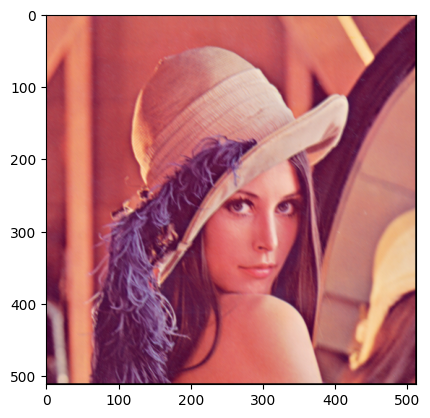

In [33]:
if __name__ == "__main__":
    """
    Choose from 0 to 10 for each feature:
    0 - Do all the below functions and save into files
    1 - Change brightness
    2 - Change contrast
    3 - Flip image
    4 - Convert to grayscale
    5 - Convert to sepia
    6 - Blur image
    7 - Sharpen image
    8 - Crop image in square shape
    9 - Crop image in circle shape
    10 - Crop image in 2 ellipses 
    """
    # Read the image
    img = read_image()
    
    mode = int(input("Choose mode for image modifying: "))
    while (mode < 0 or mode > 10):
        mode = int(input("Please enter valid choice of mode"))

    if mode == 0:
        for i in range (1, 11):
            if i == 1:
                mode_name = "brightness"
            elif i == 2:
                mode_name = "contrast"
            elif i == 3:
                mode_name = "flip"
            elif i == 4:
                mode_name = "grayscale"
            elif i == 5:
                mode_name = "sepia"
            elif i == 6:
                mode_name = "blur"
            elif i == 7:
                mode_name = "sharpening"
            elif i == 8:
                mode_name = "crop_square"
            elif i == 9:
                mode_name = "crop_circle"
            elif i == 10:
                mode_name = "crop_ellipses"
            export_image(executing_mode(img, i), mode_name)
    else:
        plt.imshow(executing_mode(img, mode))